In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Datos de Properati
#data = pd.read_csv('/home/martin/Documents/jupyter/datasets/properati-AR-2017-08-01-properties-sell.csv')
data = pd.read_csv('datos_procesados.csv',low_memory = False)

In [2]:
data.sample(5)

,Unnamed: 0,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
198554,49276,NaN,2014-09-25,ARS,NaN,NaN,NaN,1.0,3435257.0,NaN,...,NaN,2336.159737,http://www.properati.com.ar/isid_venta_departa...,apartment,1.0,NaN,NaN,38.0,NaN,NaN
351866,102944,NaN,2015-10-06,USD,Venta casa ph en haedo 4 ambientes 3 dormito...,NaN,"{""address"":""DIRECTORIO 1500"",""original_url"":""h...",NaN,NaN,NaN,...,1433.333333,2866.666667,http://haedo.properati.com.ar/uf5m_venta_ph_haedo,PH,4.0,NaN,90.0,NaN,45.0,PH en Venta Haedo / Moron (A008 695)
448955,29502,Argentina,2017-05-05,ARS,"Casa de 2 dormitorios, baño, living-comedor, c...",NaN,NaN,NaN,3865084.0,8b3824abb796c3e899ec2c4bb9a3671d2fa4a796,...,7538.461538,274.810000,http://www.properati.com.ar/17z5t_venta_casa_b...,house,NaN,Buenos Aires Interior,130.0,NaN,200.0,CASA A RECICLAR
340399,65663,NaN,2015-07-12,USD,CODIGO: 2896-v504 ubicado en: Los Pinos 78 - ...,NaN,"{""address"":""Los Pinos 78"",""images"":[""http://im...",NaN,3839996.0,NaN,...,750.000000,200.000000,http://punilla.properati.com.ar/rsro_venta_cas...,house,NaN,NaN,160.0,NaN,600.0,SE VENDE IMPECABLE CHALET DE DOS PLANTAS BIALE...
467041,64281,Argentina,2017-07-19,USD,Aberturas de PVC Símil Madera DVH. Calefacción...,4800.0,NaN,NaN,3427753.0,626e1c1e50f9602a12e22ede30384d7836901c47,...,1750.000000,1604.166667,http://www.properati.com.ar/1aanh_venta_casa_t...,house,NaN,Bs.As. G.B.A. Zona Norte,220.0,NaN,240.0,Casa San Agustin Villanueva


In [3]:
#Filtro los datos que me interesan (estado, barrio, superficie, precio, y ubicacion)
data2 = data[['state_name','place_name','surface_covered_in_m2','price_per_m2','lat','lon']]

#Limpio los Na
data2.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
data2['precio_propiedad'] = data2['surface_covered_in_m2']*data2['price_per_m2']

#Separo los datos de Capital Federal y Gran Buenos Aires
dataCF = data2[data2['state_name']== 'Capital Federal']
dataGBA = data2.loc[data2.state_name.str.contains('G.B.A.'),:]

#Armo un join de ambos datos
dataCFGBA = pd.concat([dataCF, dataGBA])

print(len(dataCF))
print(len(dataGBA))
print(len(dataCFGBA))

35129
31464
66593


/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
dataCFGBA.sample(10)

,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
449175,Capital Federal,Floresta,30.0,2666.666667,-34.632947,-58.476699,80000.0
454377,Bs.As. G.B.A. Zona Norte,Olivos,44.0,2772.727273,-34.521494,-58.506786,122000.0
435563,Bs.As. G.B.A. Zona Sur,Bernal,45.0,2093.511111,-34.720634,-58.254605,94208.0
424447,Capital Federal,Once,80.0,1625.000000,-34.601078,-58.400505,130000.0
416911,Capital Federal,Puerto Madero,188.0,6010.638298,-34.609428,-58.362878,1130000.0
448686,Capital Federal,San Telmo,22.0,2477.272727,-34.623454,-58.376448,54500.0
419869,Capital Federal,Almagro,43.0,2790.697674,-34.615352,-58.411159,120000.0
426362,Capital Federal,San Nicolás,55.0,2454.545455,-34.601702,-58.388588,135000.0
369967,Capital Federal,Palermo,217.0,3640.552995,-34.584990,-58.407270,790000.0
407353,Capital Federal,Palermo,27.0,4444.444444,-34.580135,-58.409961,120000.0


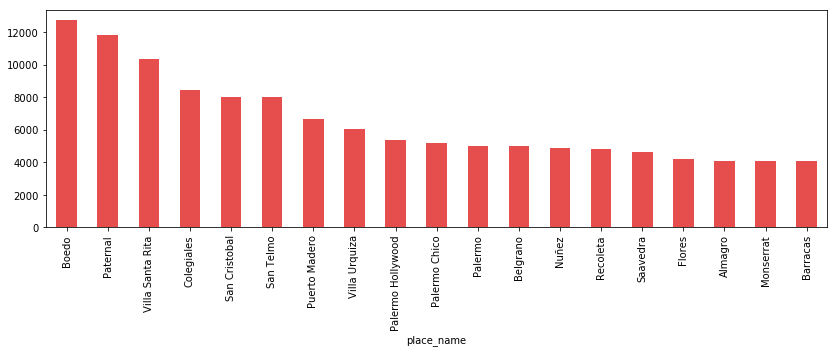

In [5]:
#Barrios de mayor precio por metro cuadrado en Capital Federal
dataCF.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

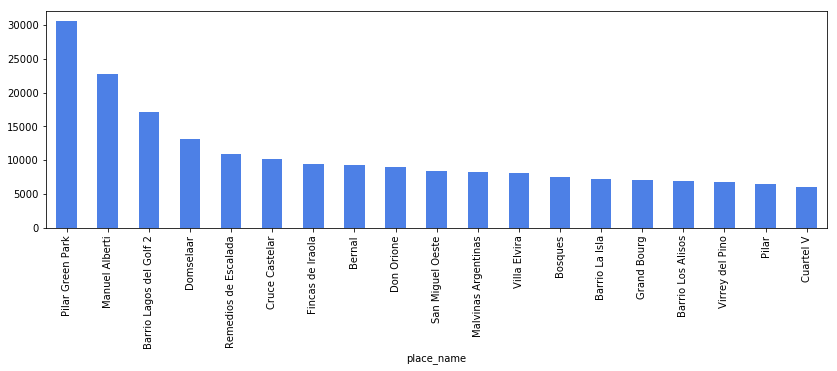

In [6]:
#Barrios de mayor precio por metro cuadrado en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

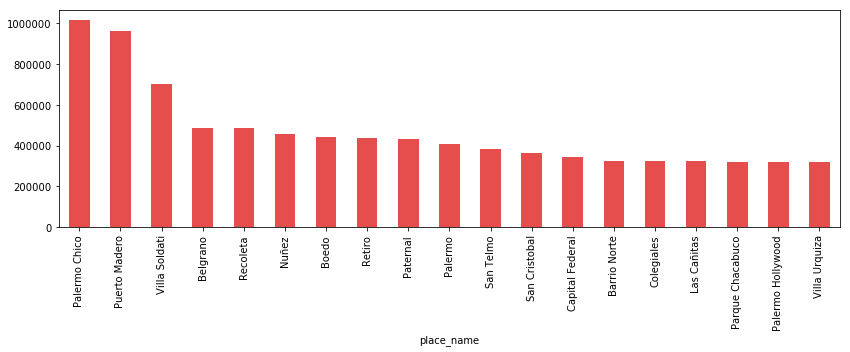

In [7]:
#Barrios de mayor precio de propiedad en Capital Federal
dataCF.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

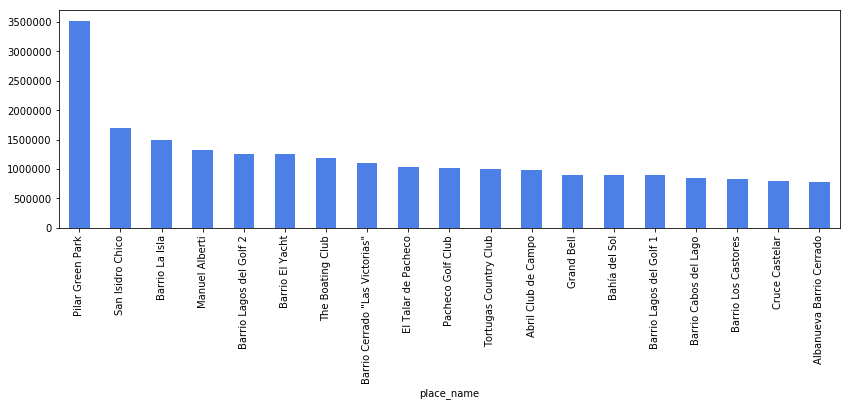

In [8]:
#Barrios de mayor precio de propiedad en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

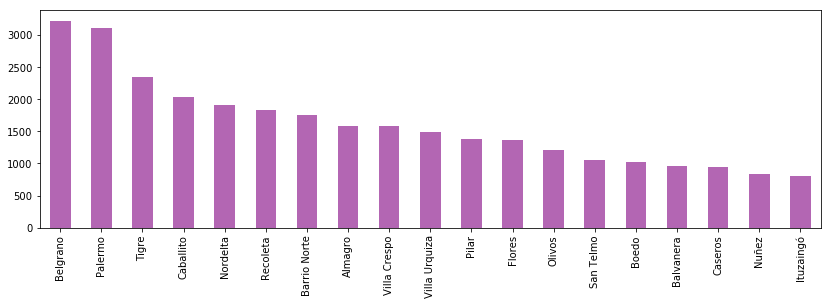

In [9]:
#Barrios con mayor numero de propiedades (GBA y CF)

dataCFGBA['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

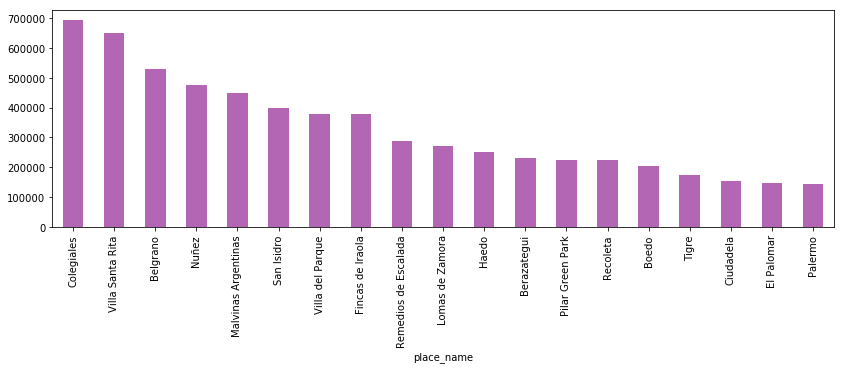

In [10]:
#Propiedades con mayor precio por metro cuadrado por barrio

dataCFGBA.groupby(['place_name'], sort=False)['price_per_m2'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

In [ ]:
#Propiedades más caras por barrio

dataCFGBA.groupby(['place_name'], sort=False)['precio_propiedad'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

In [31]:
#Top 10 propiedades más caras
dataCFGBA.sort_values(['precio_propiedad'], ascending=False).head(10)

,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
466909,Capital Federal,Nuñez,105.0,476190.476190,-34.548221,-58.455716,5.000000e+07
466910,Capital Federal,Nuñez,105.0,476190.476190,-34.548221,-58.455716,5.000000e+07
368761,Bs.As. G.B.A. Zona Norte,Pilar Green Park,111.0,225225.225225,-34.455906,-58.908329,2.500000e+07
480994,Capital Federal,Belgrano,138.0,91564.840580,-34.569867,-58.457581,1.263595e+07
423346,Capital Federal,Barracas,5000.0,2400.000000,-34.641421,-58.374063,1.200000e+07
491599,Bs.As. G.B.A. Zona Oeste,Ituzaingó,85.0,141176.470588,-34.657171,-58.682625,1.200000e+07
481042,Capital Federal,Belgrano,138.0,86550.869565,-34.569867,-58.457581,1.194402e+07
480958,Capital Federal,Belgrano,138.0,84857.289855,-34.569867,-58.457581,1.171031e+07
480989,Capital Federal,Belgrano,138.0,83185.992754,-34.569867,-58.457581,1.147967e+07
481002,Capital Federal,Belgrano,138.0,81559.260870,-34.569867,-58.457581,1.125518e+07


In [23]:
#¿La cercanía al centro afecta los precios?

#Coordenadas del obelisco: 34°36′11″S 58°22′54″O / -34.603075, -58.381653
obelisco_lon=-58.381653
obelisco_lat=-34.603075

#le agrego a los datos de Capital Federal una columna con la distancia al centro (tomo el obelisco como referencia)
dataCF['dist_centro'] = np.absolute(dataCF['lon'] - obelisco_lon)+ np.absolute(dataCF['lat'] - obelisco_lat)

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


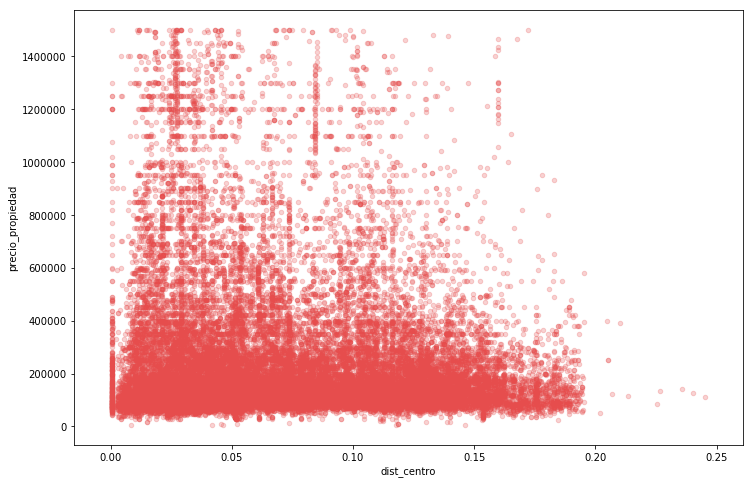

In [24]:
#Armo scatter plot con relación entre la distancia al obelisco y el precio
dataCF1 = dataCF[dataCF['precio_propiedad']< 1500000]
dataCF2 = dataCF1[dataCF1['dist_centro']< 0.4]
dataCF2.plot.scatter('dist_centro', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3))